In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas
import seaborn as sns
import matplotlib
import csv
import numpy
from matplotlib import pyplot as plt

In [3]:
data = []
with open("/home/f3dot/Загрузки/Cleaned_ships_data.csv", "r") as f:
    reader = csv.reader(f)
    for line in reader:
        data.append(line)

In [4]:
length = list(set(int(data[i][5]) for i in range(1, len(data))))
length.sort()
avarage = []
for i in range(len(length)):
    sum_v = 0
    cnt = 0
    for j in range(len(data)):
        if data[j][5] == str(length[i]):
            sum_v += int(data[j][4])
            cnt += 1
    avarage.append(sum_v / cnt)

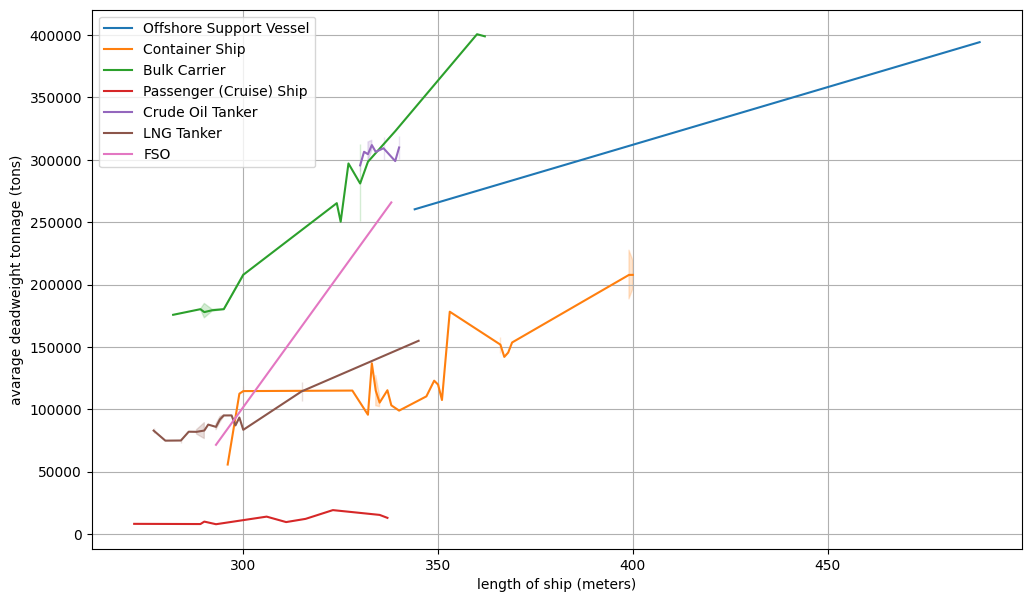

In [5]:
plt.figure(figsize=(12, 7))
#plt.plot(length, avarage , label = "dependence of the vessel's workload on its length")
df = pandas.read_csv("/home/f3dot/Загрузки/Cleaned_ships_data.csv")
ax = sns.lineplot(df, x = "length", y = "dwt", hue ="ship_name")
plt.xlabel("length of ship (meters)")
plt.ylabel("avarage deadweight tonnage (tons)")
plt.grid()
plt.legend()
plt.show()

In [6]:
def quantity(data, name, column):
    cnt= 0
    for i in range(1, len(data)):
        if data[i][column] == name:
            cnt += 1
    return cnt

In [7]:
names = list(set(data[i][1] for i in range(1, len(data))))
counts = [quantity(data, i, 1) for i in names]
dependence = dict(zip(names, counts))
sorted_dependence = sorted(dependence.items(), key=lambda item: item[1])[::-1]

x1 = [sorted_dependence[i][0] for i in range(len(sorted_dependence) - 3)]
x1.append("Other")

counts.sort()
y1 = [sorted_dependence[i][1] for i in range(len(sorted_dependence) - 3)]
others_value = 0
for i in range(3):
    others_value += int(counts[i])
y1.append(others_value)

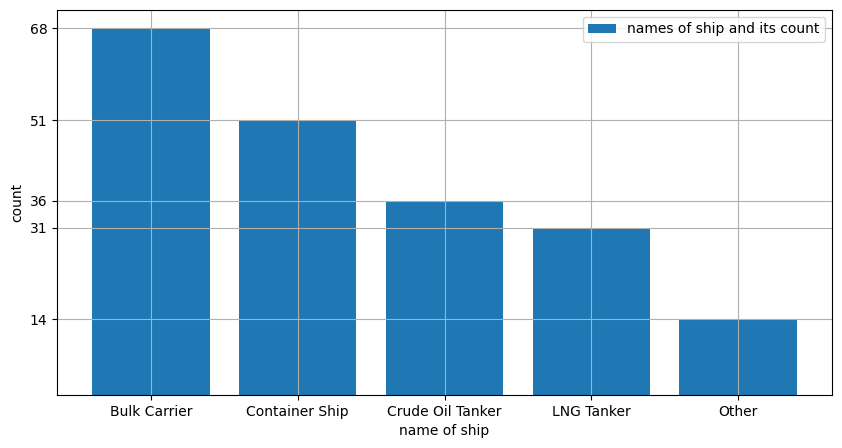

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(x1, y1, label = "names of ship and its count")
plt.xlabel("name of ship")
plt.ylabel("count")
plt.grid()
plt.yticks(y1)
plt.legend()
plt.show()

In [9]:
years = list(set(data[i][2] for i in range(1, len(data))))
counts_y = [quantity(data, i, 2) for i in years]
dependence_y = dict(zip(years, counts_y))
sorted_dependence_y = sorted(dependence_y.items(), key=lambda item: item[0])
x2 = [sorted_dependence_y[i][0] for i in range(len(sorted_dependence_y))]
y2 = [sorted_dependence_y[i][1] for i in range(len(sorted_dependence_y))]

In [10]:
plt.figure(figsize=(20, 10))
plt.bar(x2, y2, label ="number of ships built each year")
plt.ylabel("count of ships")
plt.xlabel("year of construction")
plt.yticks(y2)
plt.grid()
plt.legend()
plt.show()

In [11]:
def max_value(data, year):
    maximum = 0
    for i in range(1, len(data)):
        if data[i][2] == year and int(data[i][4]) > maximum:
            maximum = int(data[i][4])
    return maximum

In [12]:
plt.figure(figsize=(35,20))
sns.histplot(df, x = "built_year", y = "dwt", bins = 47, cbar=True, cbar_kws=dict(shrink=.75)) #len(years)
plt.xticks([int(i) for i in x2])
plt.yticks(numpy.linspace(df['dwt'].min(), df['dwt'].max(), 20))
plt.show()

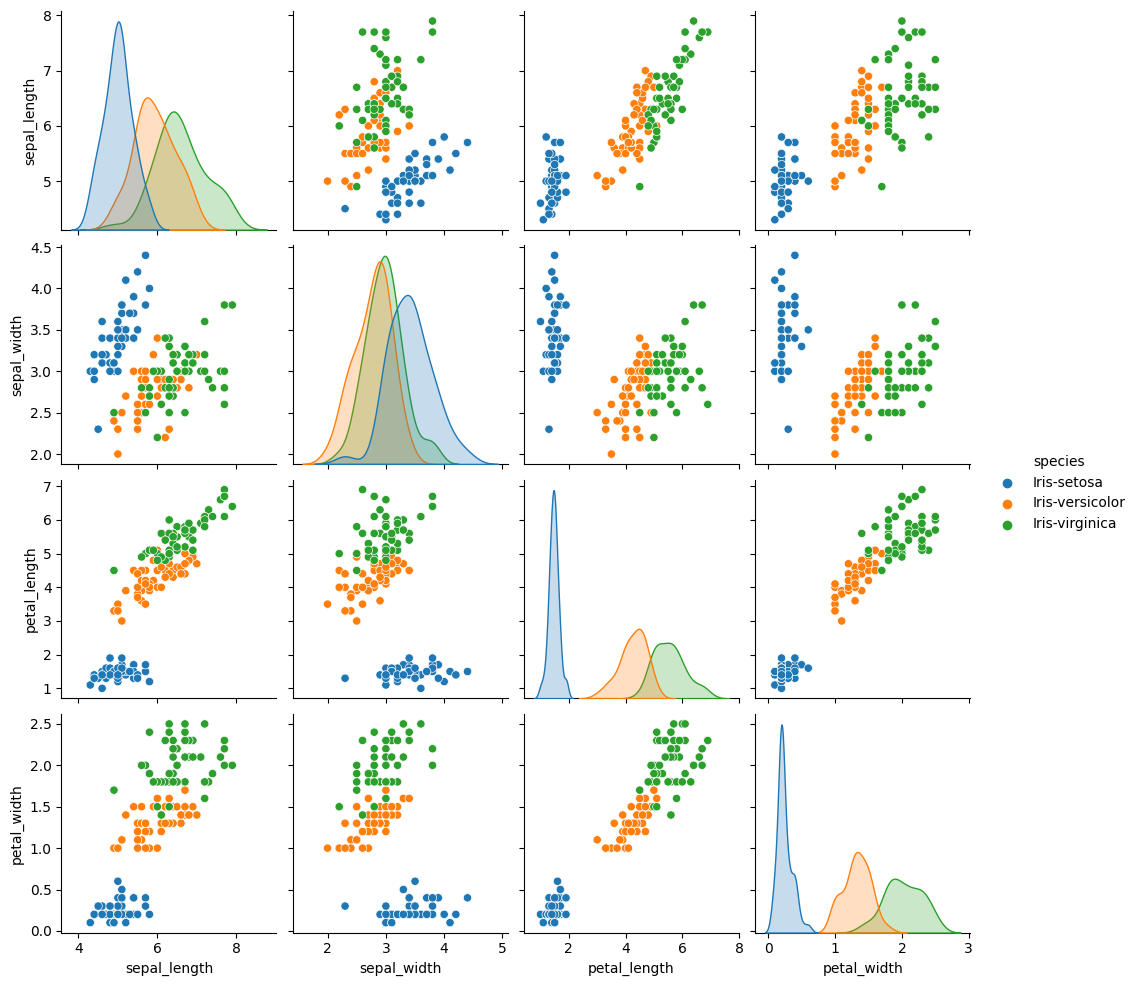

In [13]:
iris = pandas.read_csv("/home/f3dot/Загрузки/IRIS.csv")
sns.pairplot(iris, hue="species")
plt.show()

In [14]:
iris = pandas.read_csv("/home/f3dot/Загрузки/IRIS.csv")

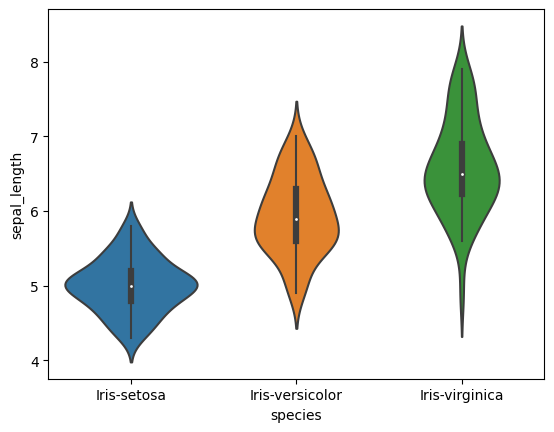

In [15]:
sns.violinplot(x=iris.species, y=iris.sepal_length, data=iris)
plt.show()

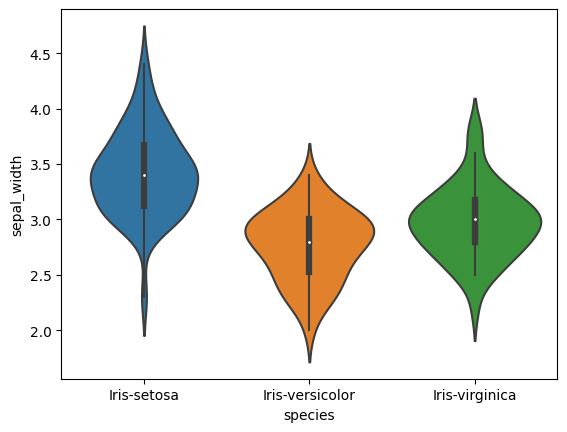

In [16]:
sns.violinplot(x=iris.species, y=iris.sepal_width, data=iris)
plt.show()

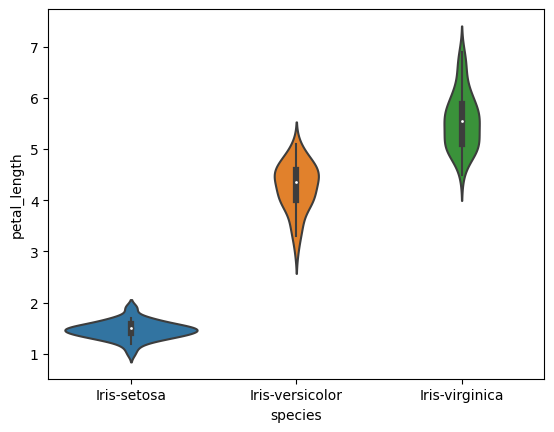

In [17]:
sns.violinplot(x=iris.species, y=iris.petal_length, data=iris)
plt.show()

In [18]:
sns.violinplot(x=iris.species, y=iris.petal_width, data=iris)
plt.show()

In [19]:
data1 = []
with open("/home/f3dot/Загрузки/Data Science Salary 2021 to 2023.csv", "r") as f:
    reader = csv.reader(f)
    for line in reader:
        data1.append(line)

In [20]:
def quantity(data, value, column):
    cnt = 0
    for i in range(len(data)):
        if data[i][column] == value:
            cnt += 1
    return cnt

In [21]:
professions = list(set([data1[i][3] for i in range(1, len(data1))]))
count = [quantity(data1, profession, 3) for profession in professions]
prof_cnt = dict(zip(professions, count))
sorted_prof_cnt = sorted(prof_cnt.items(), key=lambda item: item[1])[::-1]

In [22]:
year_list = list(set([int(data1[i][0]) for i in range(1, len(data1))]))
year_list.sort()
paid_yearly = []
for q in year_list:
    tmp =[]
    for i in range(1, len(data1)):
        if int(data1[i][0]) == q:
            tmp.append(int(data1[i][6]))
    paid_yearly.append(tmp)
avarage_paid = [sum(paid_yearly[i]) / len(paid_yearly[i]) for i in range(len(year_list))]

In [23]:
plt.plot(year_list, avarage_paid , label = "avarage paid Data science worker per year for each year")
plt.xlabel("year")
plt.ylabel("avarage paid")
plt.grid()
plt.legend()
plt.show()

### Визуализировал изменение средней зарплаты у людей работающих в сфере Data Science. 

В период с 2020 по 2023 зарплата постоянно росла, и если сравнивать среднюю зарплату в 2020 и в 2023 году, то она выросла приблизительно в 1,5 раза.

In [24]:
data_ml = []
for i in range(len(data1)):
    if data1[i][3] == "Machine Learning Engineer":
        data_ml.append(data1[i])

In [25]:
experience = list(set([data1[i][1] for i in range(1, len(data1))]))

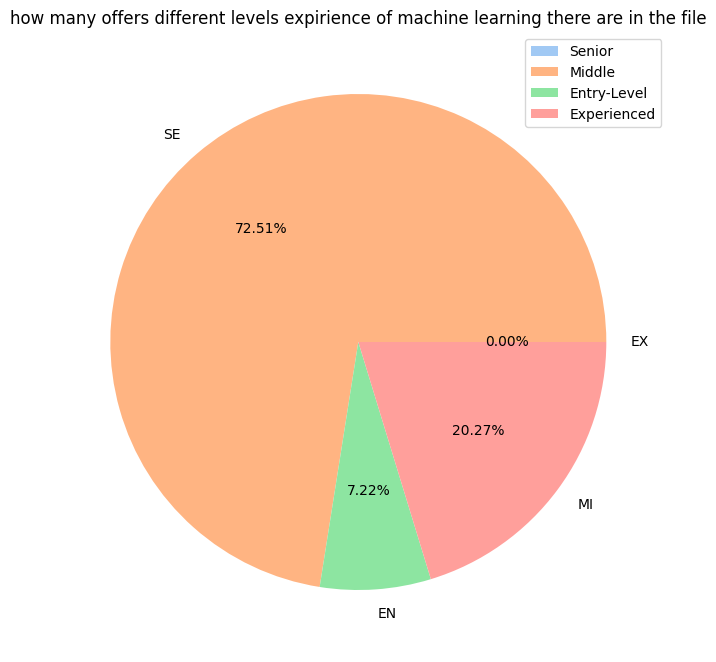

In [26]:
colors = sns.color_palette('pastel')[ 0:5 ]
count_exp = [quantity(data_ml, i, 1) for i in experience]
plt.figure(figsize=(8, 10))
plt.pie(count_exp, labels = experience, colors = colors, autopct='%.2f%%')
plt.legend(["Senior", "Middle","Entry-Level", "Experienced"])
plt.title("how many offers different levels expirience of machine learning there are in the file")
plt.show()

### Визуализировал количество всех предложений по работе на специальность Machine Learning. 

Больше всего предложений на уровень SE, а на уровень EX предложения отсутствуют.

In [27]:
paids = []
for i in range(10):
    paid = 0
    for j in data1:
        if j[3] == sorted_prof_cnt[i][0] and int(j[6]) > paid:
            paid = int(j[6])
    paids.append(paid)

In [28]:
#sorted_prof = [sorted_prof_cnt[i][0] for i in range(10)]
sorted_prof = [sorted_prof_cnt[i][0] for i in range(10)]
dependence = list(zip(sorted_prof, paids))
#print(dependence)
plt.figure(figsize=(25,10))
plt.bar([dependence[i][0] for i in range(10)], [dependence[i][1] for i in range(10)], label="top paid of 10 most popular job in Data Science")
plt.grid()
plt.legend()
plt.show()

### Визуализировал максимальную зарплату по 10 самым популярным специальностям. 

Самое высокое предложение по зарплате является по специальности Research Scientist. Минимальная по Analytics Engineer. По всем всем специальностям максимальная зарплаты выше 250000$ в год.

In [29]:
top_job = [dependence[i][0] for i in range(10)]
data_set = []
for i in data1:
    if i[3] in top_job:
        data_set.append(i)

In [30]:
df = pandas.DataFrame(data_set)
df.columns = data1[0]
df['salary_in_usd'] = df['salary_in_usd'].astype (int)

In [31]:
#min_paid = []
for i in range(10):
    paid = 450000
    for j in data1:
        if j[3] == sorted_prof_cnt[i][0] and int(j[6]) < paid:
            paid = int(j[6])
    paids.append(paid)

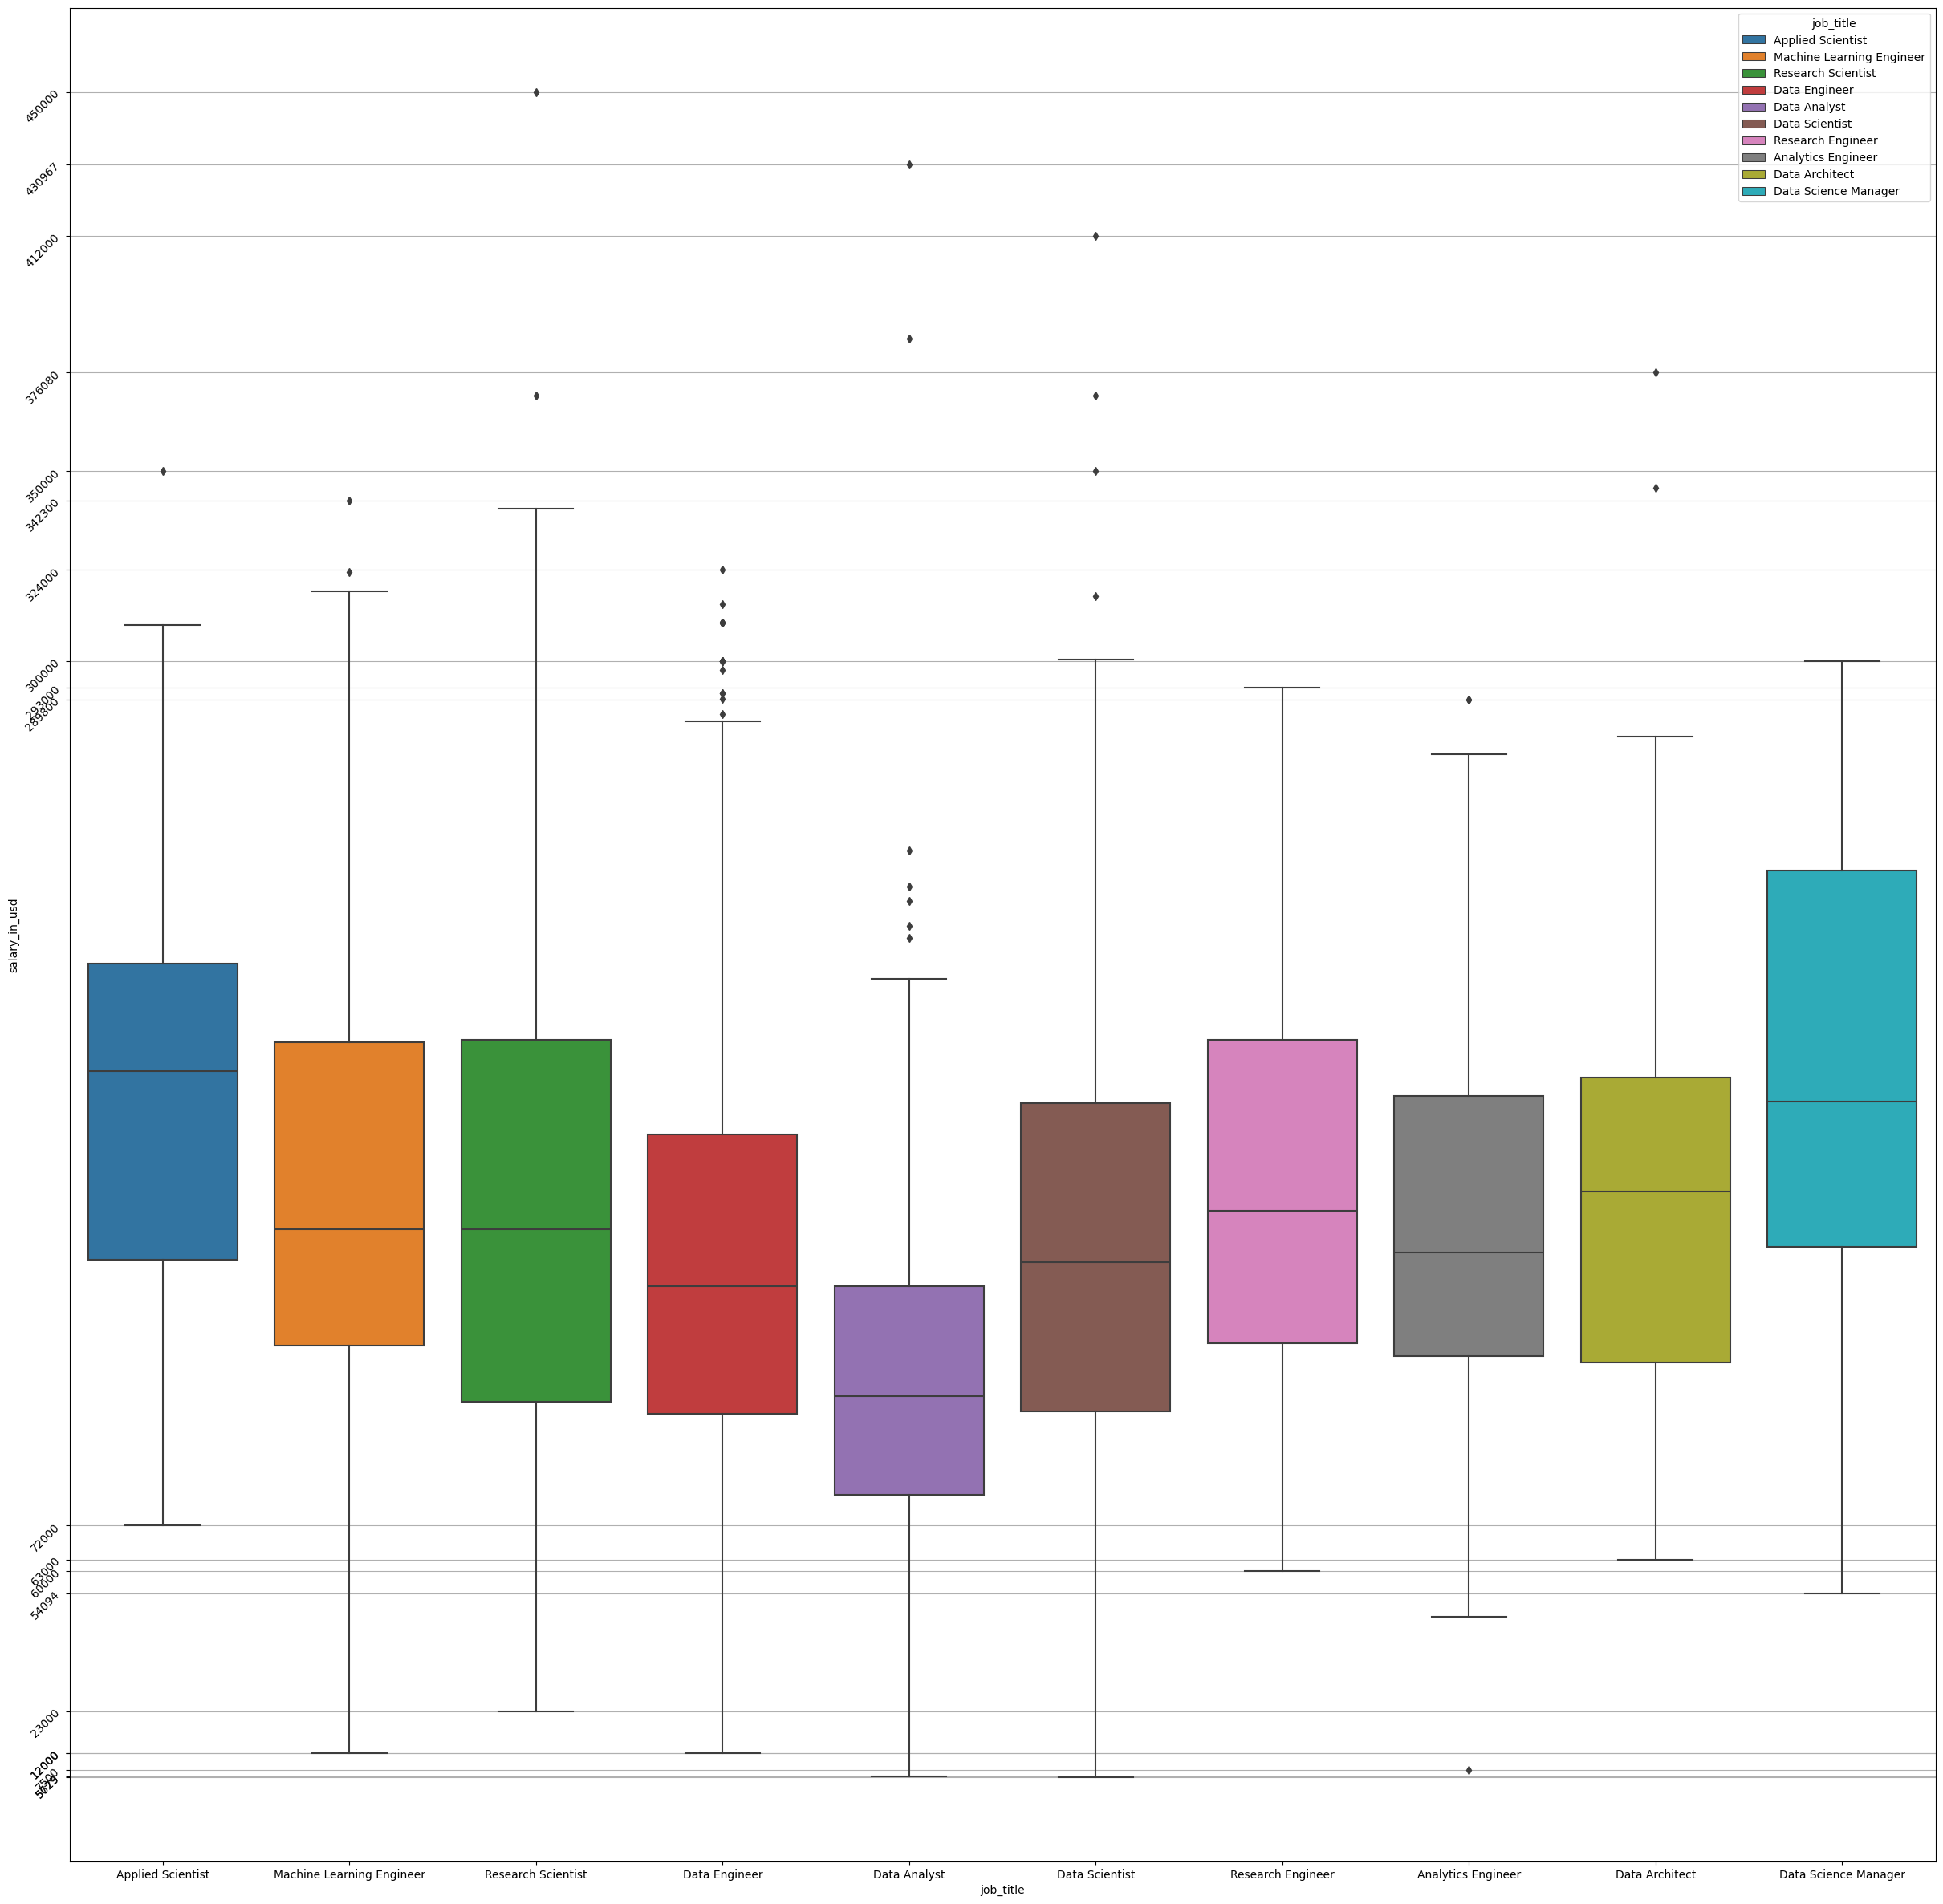

In [32]:
plt.figure(figsize=(30,30))
plt.yticks(paids, rotation=45)
plt.grid()
sns.boxplot(df, x = df.job_title, y = df.salary_in_usd, hue=df.job_title, dodge=False) #x = df.job_title, 
plt.show()